In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K


## Data set


In [2]:

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape, y_train.shape)

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


(60000, 28, 28) (60000,)
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## Model


In [3]:

batch_size = 128
num_classes = 10
epochs = 10

model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),activation='relu',input_shape=input_shape)) #(128,28,28,1)
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [4]:

model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [5]:
hist = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 23s 46ms/step - loss: 0.2144 - accuracy: 0.9381 - val_loss: 0.0745 - val_accuracy: 0.9744
Epoch 2/10
469/469 [==============================] - 21s 46ms/step - loss: 0.0559 - accuracy: 0.9830 - val_loss: 0.0417 - val_accuracy: 0.9863
Epoch 3/10
469/469 [==============================] - 22s 46ms/step - loss: 0.0383 - accuracy: 0.9883 - val_loss: 0.0336 - val_accuracy: 0.9886
Epoch 4/10
469/469 [==============================] - 21s 45ms/step - loss: 0.0285 - accuracy: 0.9913 - val_loss: 0.0380 - val_accuracy: 0.9869
Epoch 5/10
469/469 [==============================] - 21s 45ms/step - loss: 0.0237 - accuracy: 0.9923 - val_loss: 0.0297 - val_accuracy: 0.9897
Epoch 6/10
469/469 [==============================] - 22s 46ms/step - loss: 0.0187 - accuracy: 0.9938 - val_loss: 0.0339 - val_accuracy: 0.9888
Epoch 7/10
469/469 [==============================] - 22s 47ms/step - loss: 0.0155 - accuracy: 0.9952 - val_loss: 0.0301 - val_accuracy:

In [6]:

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

model.save('mnist.h5')
print("Saving the model as mnist.h5")

Test loss: 0.032270994037389755
Test accuracy: 0.9907000064849854
Saving the model as mnist.h5


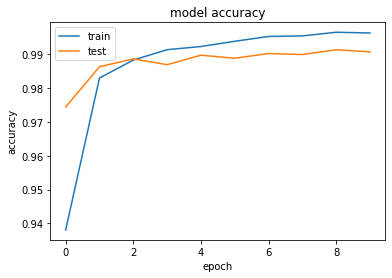

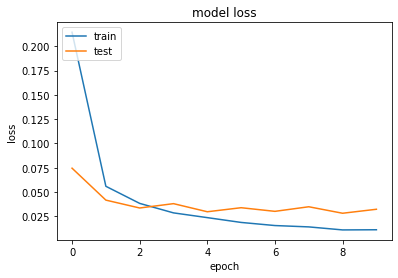

In [7]:
import matplotlib.pyplot as plt
import numpy as np


# summarize hist for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize hist for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()